In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as mt

In [24]:
df_parameters = pd.read_excel('C:/Users/jae4518/OneDrive - Imperial College London/HiRise_Images_Clusters/ClustersDataSheet/NewClustersParameters.xlsx')

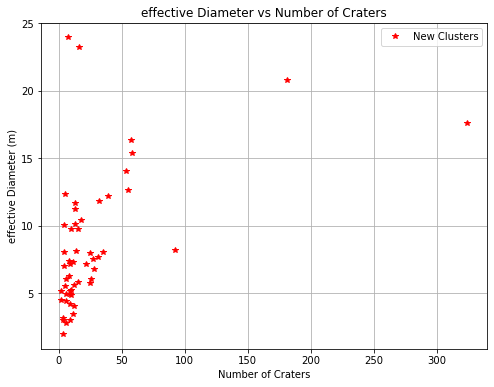

In [26]:
#effective diameter vs number of craters:
d_eff =np.array(df_parameters['d_eff'].values)
crater_no = np.array(df_parameters['Number_Craters'].values)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(crater_no,d_eff, 'r*', label = 'New Clusters') #plotting new clusters
ax.set_xlabel('Number of Craters')
ax.set_ylabel('effective Diameter (m)')
ax.set_title('effective Diameter vs Number of Craters')
ax.grid('k')
ax.legend(loc = 'best')

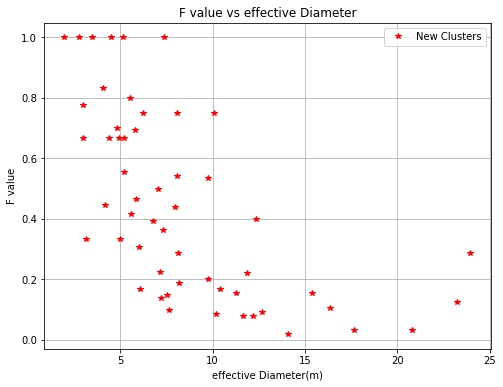

In [17]:
#F-value vs effective diameter:
F_values = np.array(df_parameters['F_value'].values)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_eff, F_values, 'r*', label = 'New Clusters') #plotting new clusters
ax.set_xlabel('effective Diameter(m)')
ax.set_ylabel('F value')
ax.set_title('F value vs effective Diameter')
ax.grid('k')
ax.legend(loc = 'best')

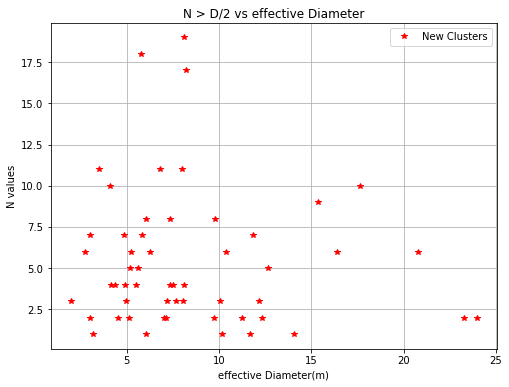

In [16]:
#N vs effective diameter:
N_array = np.array(df_parameters['N>D/2'].values)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_eff, N_array, 'r*', label = 'New Clusters') #plotting new clusters
ax.set_xlabel('effective Diameter(m)')
ax.set_ylabel('N values')
ax.set_title('N > D/2 vs effective Diameter')
ax.grid('b')
ax.legend(loc = 'best')

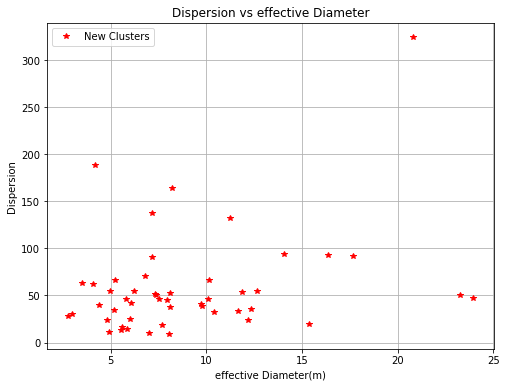

In [29]:
#Dispersion vs effective diameter:
disp = np.array(df_parameters['Dispersion'].values)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(d_eff, disp, 'r*', label = 'New Clusters') #plotting new clusters
ax.set_xlabel('effective Diameter(m)')
ax.set_ylabel('Dispersion')
ax.set_title('Dispersion vs effective Diameter')
ax.grid('k')
ax.legend(loc = 'best')